In [68]:
import json
import random
import shutil
import os
random.seed(23) ######### seed 고정

In [69]:
def split_json_images(json_filename, img_dir, train_ratio, train_output_json, val_output_json,
                      train_output_img, val_output_img):
    with open(json_filename, 'r') as f:
        data = json.load(f)
    root = "/opt/ml/input/data/medical/img"
    image_filenames = list(data['images'].keys())
    total_images = len(image_filenames)
    train_size = int(total_images * train_ratio)

    random.shuffle(image_filenames)

    train_filenames = image_filenames[:train_size]  # train file name list
    val_filenames = image_filenames[train_size:]  # val file name list

    train_data = {'images': {filename: data['images'][filename] for filename in train_filenames}}
    val_data = {'images': {filename: data['images'][filename] for filename in val_filenames}}

    with open(train_output_json, 'w') as train_file:
        json.dump(train_data, train_file, indent=2)

    with open(val_output_json, 'w') as val_file:
        json.dump(val_data, val_file, indent=2)

    train_output_img_path = os.path.join(root, train_output_img)
    os.makedirs(train_output_img_path, exist_ok=True)
    print(train_output_img_path)
    for filename in train_filenames:
        src_img_path = os.path.join(root, img_dir, filename)
        dst_img_path = os.path.join(train_output_img_path, filename)
        shutil.copy(src_img_path, dst_img_path)

    val_output_img_path = os.path.join(root, val_output_img)
    os.makedirs(val_output_img_path, exist_ok=True)
    print(val_output_img_path)
    for filename in val_filenames:
        src_img_path = os.path.join(root, img_dir, filename)
        dst_img_path = os.path.join(val_output_img_path, filename)
        shutil.copy(src_img_path, dst_img_path)

# ex :   split_json_images('./train_origin.json', 'train', 0.8, './train.json', './val.json', 'train_images', 'val_images')   )

In [70]:
## 이미지 개수 확인하기 (잘 분리됐는지 or 합쳐졌는지 확인)

def json_num(path): #json의 images key 개수
    with open(path, 'r') as f:
      data = json.load(f)
    images = data['images']
    return len(images)

# ex : json_num('./train_origin.json')

def img_num(path): #이미지파일 개수
    file_list = os.listdir(path)
    return len(file_list)

# ex : img_num("/opt/ml/input/data/medical/img/train_images")

In [71]:
def merge_json(file1, file2, output_json, file1_img_dir, file2_img_dir, output_img_dir):
    with open(file1, 'r') as f:
        data1 = json.load(f)

    with open(file2, 'r') as f:
        data2 = json.load(f)

    merged_data = {}

    # file 1
    for filename, image_data in data1['images'].items():
        merged_data[filename] = image_data

    # file 2
    for filename, image_data in data2['images'].items():
        merged_data[filename] = image_data

    merged_json = {'images': merged_data}

    with open(output_json, 'w') as file:
        json.dump(merged_json, file, indent=2)


    image_dir = "/opt/ml/input/data/medical/img"
    train_image_dir = os.path.join(image_dir, file1_img_dir)
    val_image_dir = os.path.join(image_dir, file2_img_dir)

    merged_image_dir = os.path.join(image_dir, output_img_dir)

    # Create the merged output directory
    os.makedirs(merged_image_dir, exist_ok=True)

    # Copy images from train_images directory
    for filename in os.listdir(train_image_dir):
        src_img_path = os.path.join(train_image_dir, filename)
        dst_img_path = os.path.join(merged_image_dir, filename)
        shutil.copy(src_img_path, dst_img_path)

    # Copy images from val_images directory
    for filename in os.listdir(val_image_dir):
        src_img_path = os.path.join(val_image_dir, filename)
        dst_img_path = os.path.join(merged_image_dir, filename)
        shutil.copy(src_img_path, dst_img_path)


# ex : merge_json('./train.json', './val.json', './merge1.json', 'train_images', 'val_images', 'merge1')

In [59]:
 img_num("/opt/ml/input/data/medical/img/train")

100


seed = 23 <br>
<b><<과정1>></b><br> 실제 train.json에서 0.8/0.2 비율로 나눠주기 => train1.json / val1.json <br>
<b><<과정2>></b><br> 실습결과물 annotation.json에서 0.8/0.2 => train2.json / val2.json

<b><<과정 3>></b><br>
train1 + train2 => <b>train_split.json</b> <br>
val1 + val2 => <b>val_split.json</b>


In [60]:
print("<<과정1>>")
split_json_images('./train.json', "train", 0.8, './train1.json', './val1.json', 'train1', 'val1')  
print("전체 json: ", json_num('./train.json'), "\ntrain1.json : ", json_num('./train1.json'), "\nval1.json : ", json_num('./val1.json') )
print("\n전체 img : ", img_num("/opt/ml/input/data/medical/img/train"), "\ntrain 이미지 : ", img_num("/opt/ml/input/data/medical/img/train1"), "\nval 이미지 : ", img_num("/opt/ml/input/data/medical/img/val1") )

<<과정1>>
/opt/ml/input/data/medical/img/train1
/opt/ml/input/data/medical/img/val1
전체 json:  100 
train1.json :  80 
val1.json :  20

전체 img :  100 
train 이미지 :  80 
val 이미지 :  20


In [61]:
print("<<과정2>>")
split_json_images('./annotation.json', "anno", 0.8, './train2.json', './val2.json', 'train2', 'val2')  
print("전체 json: ", json_num('./annotation.json'), "\ntrain2.json : ", json_num('./train2.json'), "\nval2.json : ", json_num('./val2.json') )
print("\n전체 img : ", img_num("/opt/ml/input/data/medical/img/anno"), "\ntrain2 이미지 : ", img_num("/opt/ml/input/data/medical/img/train2"), "\nval2 이미지 : ", img_num("/opt/ml/input/data/medical/img/val2") )

<<과정2>>
/opt/ml/input/data/medical/img/train2
/opt/ml/input/data/medical/img/val2
전체 json:  201 
train2.json :  160 
val2.json :  41

전체 img :  201 
train2 이미지 :  160 
val2 이미지 :  41


In [62]:
print("<<과정3>>")
print("3-1: train1 + train2 => train_split")
merge_json('./train1.json', './train2.json', './train_anno_split.json', 'train1', 'train2', 'train_anno')
print("train split 개수 : ",json_num('./train_anno_split.json'), img_num("/opt/ml/input/data/medical/img/train_anno"))
print("\n3-2: val1 + val2 => val_split")
merge_json('./val1.json', './val2.json', './val_anno_split.json', 'val1', 'val2', 'val_anno')
print("val split 개수 : ",json_num('./val_anno_split.json'), img_num("/opt/ml/input/data/medical/img/val_anno"))

<<과정3>>
3-1: train1 + train2 => train_split
train split 개수 :  240 240

3-2: val1 + val2 => val_split
val split 개수 :  61 61


<br>--------------------------------------------------------------------------------------------<br>
가독성 문제 <br><br>
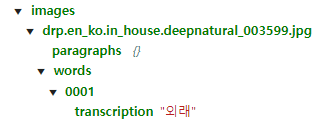  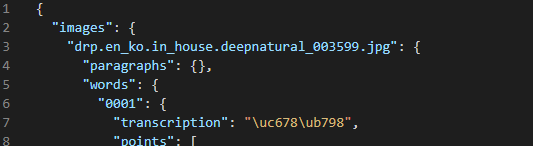 <br>
aistage 서버에서 직접 볼 땐 문제가 없는데, <br>
vs code에서 볼 땐, trainscription이 유니코드로 보임. => 실제론 같은거고, 단어내용 label을 학습하는 건 아니니깐 딱히 학습에는 문제가 없을 것 같은데.. <br>가독성이 떨어지기도 하고 혹시나 문제가 될 수 있으니....

In [64]:
## 위 문제 해결


def json_decode(input_file, output_file):
    with open(input_file, 'r') as file:
        data = json.load(file)

    decoded_data = {}
    for key, value in data.items():
        if isinstance(value, dict):
            decoded_value = {}
            for k, v in value.items():
                if k == "transcription" and isinstance(v, str):
                    decoded_value[k] = v.encode().decode('unicode_escape')
                else:
                    decoded_value[k] = v
            decoded_data[key] = decoded_value
        else:
            decoded_data[key] = value

    with open(output_file, 'w') as file:
        json.dump(decoded_data, file, ensure_ascii=False, indent=2) 



In [67]:
## train 만
print("train만")
json_decode('./train1.json', './train1_decoded.json')
json_decode('./val1.json', './val1_decoded.json')
print("train split 개수 : ",json_num('./train1_decoded.json'))
print("val split 개수 : ",json_num('./val1_decoded.json'))

### train + anno
print("\n train + anno")
json_decode('./train_anno_split.json', './train_anno_split_decoded.json')
json_decode('./val_anno_split.json', './val_anno_split_decoded.json')
print("train split 개수 : ",json_num('./train_anno_split_decoded.json'))
print("val split 개수 : ",json_num('./val_anno_split_decoded.json'))

train만
train split 개수 :  80
val split 개수 :  20

 train + anno
train split 개수 :  240
val split 개수 :  61


<br><br>-----------------------------------------------------------------------<br>
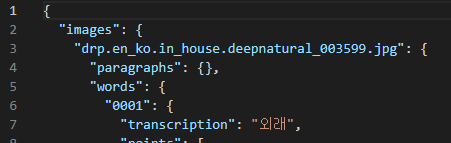 <br>
일단은 해결한 것 같음<br>
<최종 양식><br>
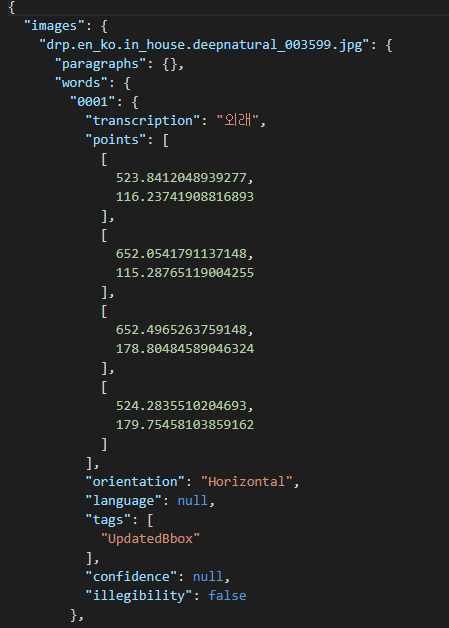

## train + anno nosplit

In [76]:
merge_json('./train.json', './annotation.json', './train_anno_nosplit.json', 'anno', 'train', 'train_anno_nosplit') #(file1, file2, output_json, file1_img_dir, file2_img_dir, output_img_dir):

In [77]:
print(img_num("/opt/ml/input/data/medical/img/train_anno_nosplit"))

301


In [78]:
print(json_num("./train_anno_nosplit.json"))

301


In [79]:
json_decode('./train_anno_nosplit.json', './train_anno_nosplit.json')